In [1]:
#import useful libraries
from bs4 import BeautifulSoup
import requests
from time import sleep, strftime
import datetime
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
import csv

import smtplib

In [2]:
#Connect to website

#chromedriver_path = 'C:/Users/Chris/Documents/chromedriver.exe'

s=Service('C:/Users/Chris/Documents/chromedriver.exe')
driver = webdriver.Chrome(service=s)
sleep(3)

website = 'https://www.tripadvisor.co.uk/Attraction_Review-g186338-d14985376-Reviews-Tottenham_Hotspur_Stadium-London_England.html'
driver.get(website)
sleep(8)

pages_to_scrape = 3

In [3]:
#close popups
Acceptbutton = driver.find_element(By.ID, "onetrust-accept-btn-handler").click()

In [4]:
#Scroll to reveal html code for reviews section
driver.execute_script("window.scrollTo(0, 4500)")

In [5]:
page_items =(1,11)

In [6]:
csvFile = open('C:/Users/Chris/Reviews.csv', 'w', newline='', encoding="utf-8")
csvWriter = csv.writer(csvFile)

In [7]:
pagecount = 0
while pagecount < pages_to_scrape:
    for j in range(page_items[0],page_items[1]):
        title = driver.find_element(By.XPATH,"//*[@id='tab-data-qa-reviews-0']/div/div[5]/div["+str(j)+"]/span/div/div[3]/a/span").text
        review = driver.find_element(By.XPATH,"//*[@id='tab-data-qa-reviews-0']/div/div[5]/div["+str(j)+"]/span/div/div[5]/div[1]/div/span").text
        csvWriter.writerow([title, review])
        print("Header: " + title + " | " + "Review: " + review )
        
    nextpage= driver.find_element(By.XPATH,"//*[@id='tab-data-qa-reviews-0']/div/div[5]/div[11]/div[1]/div/div[1]/div[2]/div/a").click()
    pagecount= pagecount + 1
    sleep(2)

Header: Expected More | Review: Treated ourselves to match day hospitality in The Residency for the Spurs - Leicester game. Entered through Gate 15 as advised 3 hours prior to kickoff and we were directed to upper floor and then to head all the way through the other hospitality areas. Several staff didn't know where The Residency was and when we arrived we had an uncomfortable 30 minute wait as only our surname and not first names were on the list. We were provided with a drink whilst we waited but it was embarrassing as we were held by the door. The service was perfunctory with waiters unable to remember drinks or what was available. Main thing to be very aware of is that all the hospitality areas share toilet facilities and there are lengthy queues at half time and pre and post match. Its is quite a scrum to get from your block entrance back to The Residency at halftime. Food ok (half time sausage rolls delicious) Not cheap and although the score was great as a Spurs fan, we were dis

Header: Lady gaga | Review: Visited the stadium for the lady gaga concert and i cannot fault the service from the staff. Very friendly, welcoming and helpful. Very well organised and security was swift but thorough. Food and drink was slightly pricy but nothing extortionate for London. Very impressed.
Header: You’re silly if you don’t go | Review: Oh my where do I even start. The stadium tour was absolutely amazing truly something special. I came with 2 of my children and they loved every single bit of the tour, they also found tour guide Louis was really helpful. He told us an awful lot about the stadium and the history of the club in the introduction. Me and my kids are not spurs fans but after today we have a soft spot for the club every single member of staff where amazing so welcome and friendly to everyone. But again I would like to thank Louis for being an amazing host and an amazing person at the same time. The tour guide on area 2 of the tour was also very informative I think 

In [8]:
csvFile.close()

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [17]:
words = pd.read_csv('Reviews.csv')

In [27]:
#removing generic wording like stadium
stop_words = list(wordcloud.stopwords)
custom_stop_words = ['stadium', 'Skywalk','Tottenham','Spurs']
stop_words = set(stop_words + custom_stop_words)

(-0.5, 399.5, 199.5, -0.5)

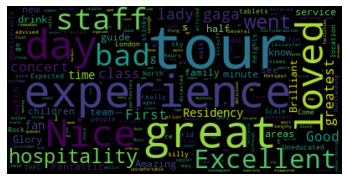

In [28]:
wordcloud = WordCloud(stopwords=stop_words).generate(str(words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")